<h1>Activity #3: Dengue</h1>

<h4>Analyst: Lee Ann Tabanao</h4>
<hr>


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>10 INSIGHTS</h1>

<Figure size 1200x800 with 0 Axes>

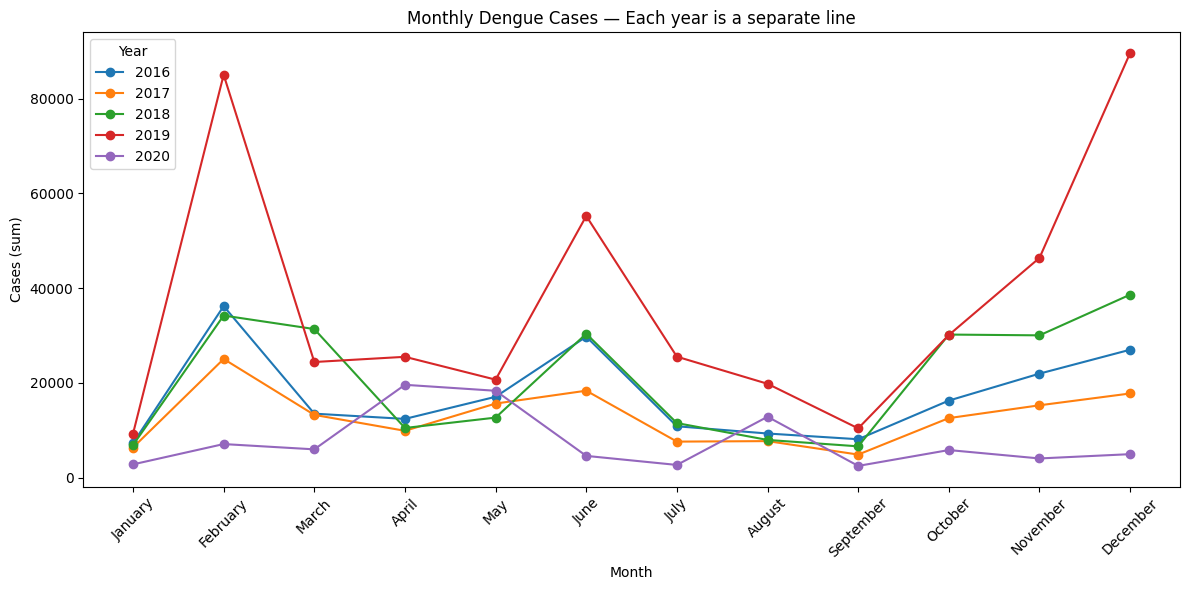

In [8]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
monthly_cases = dengue.groupby([dengue['Month'], dengue['Year']])['Dengue_Cases'].sum()
monthly_unstack = monthly_cases.unstack() 

plt.figure(figsize=(12,8))
monthly_unstack.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Monthly Dengue Cases — Each year is a separate line')
plt.xlabel('Month')
plt.ylabel('Cases (sum)')
plt.xticks(range(0,12), month_order, rotation=45)
plt.tight_layout()
plt.show()

total_by_year = dengue.groupby('Year')['Dengue_Cases'].sum()
sorted_years = total_by_year.sort_values(ascending=False)
max_year = list(sorted_years.index)[0]
max_year_total = list(sorted_years.values)[0]


<h4>INSIGHT: 1</h4>
<h3>The lines rise and fall in different ways for each year, which means dengue does not increase or decrease at the same time annually.
This shows that dengue trends are affected by changing conditions like weather, mosquito activity, and community behavior so the pattern of cases is not consistent or predictable from year to year.</h3>

<h4>INSIGHT: 2</h4>
<h3>Some lines stay much higher or lower than the rest, showing clear differences in the overall number of cases each year.
This spread between the lines indicates that dengue outbreaks vary in severity, meaning some years face heavier case loads while others remain relatively mild. This helps highlight how dengue levels can change a lot from one year to the next, depending on broader environmental and health factors..</h3>

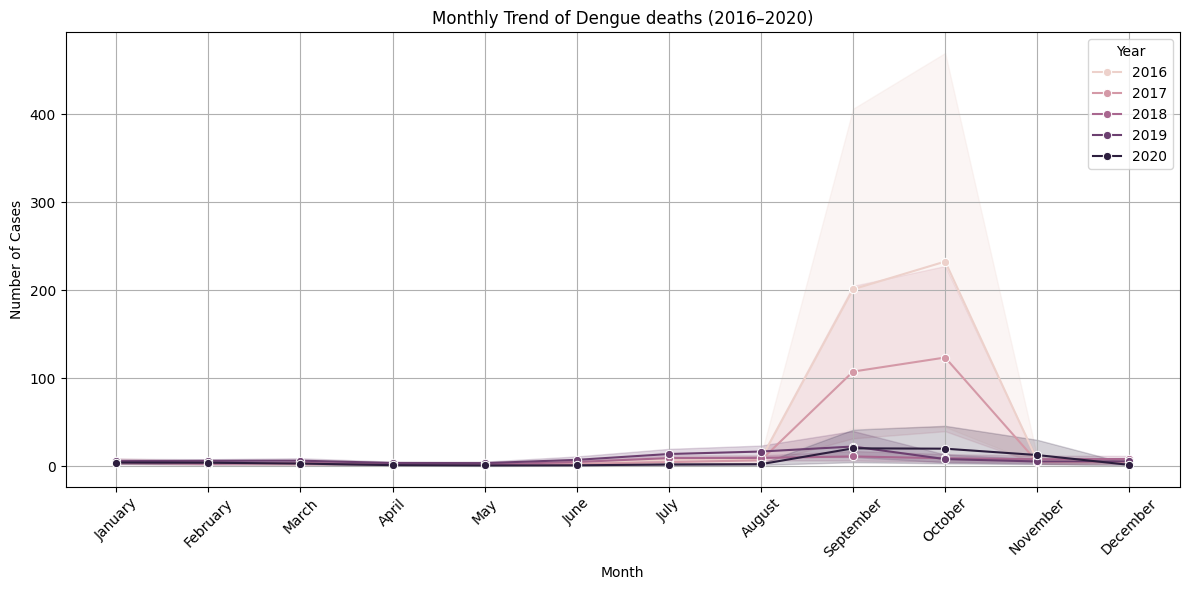

In [9]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'] 
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True) 
plt.figure(figsize=(12,6)) 
sns.lineplot(x='Month', y='Dengue_Deaths', hue='Year', data=dengue, marker='o')
plt.title('Monthly Trend of Dengue deaths (2016–2020)') 
plt.xlabel('Month')
plt.ylabel('Number of Cases') 
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout() 
plt.show()

<h4>INSIGHT: 3</h4>
<h3>The graph shows that certain months—particularly around August to October—tend to show noticeable rises, especially in some years.
This means dengue deaths are not evenly spread throughout the year, and there are specific months where the disease becomes more impactful.
This uneven distribution highlights that dengue is seasonally influenced.</h3>

<Figure size 1200x800 with 0 Axes>

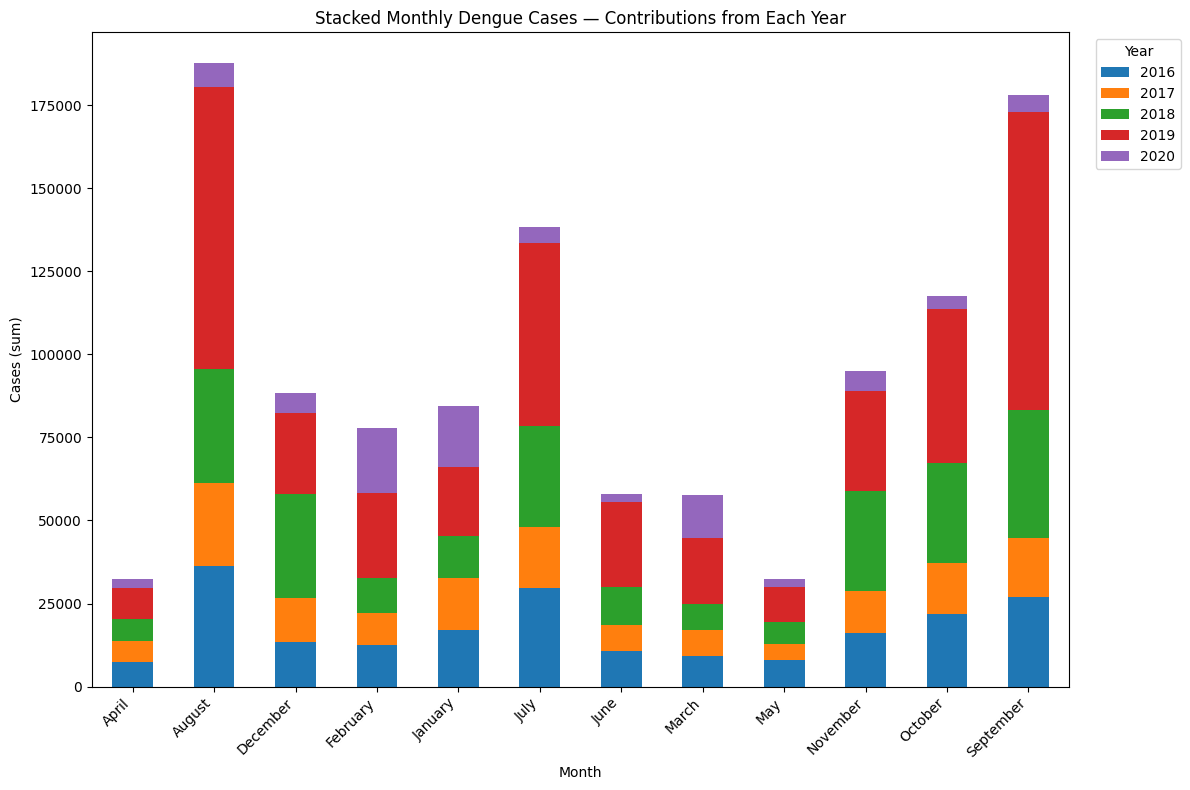

Year 2019 contributed ~38.5% of total reported cases.


In [10]:
year_totals = monthly_unstack.sum(axis=0)
sorted_years = year_totals.sort_values(ascending=False)
top_year = list(sorted_years.index)[0]
top_year_total = list(sorted_years.values)[0]

overall = year_totals.sum()
pct = top_year_total / overall * 100

plt.figure(figsize=(12,8))
monthly_unstack.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Stacked Monthly Dengue Cases — Contributions from Each Year')
plt.xlabel('Month')
plt.ylabel('Cases (sum)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

print(f"Year {top_year} contributed ~{pct:.1f}% of total reported cases.")


<h4>INSIGHT: 4</h4>
<h3>The chart shows a strong seasonal pattern where dengue cases peak sharply during the late monsoon months, with August reaching close to 190,000 cases and September following with around 170,000–180,000. This consistent timing suggests that environmental factors—such as rainfall driven mosquito breeding play a major role in amplifying transmission. The steep rise from June to August shows a rapid acceleration in case growth during this period.</h3>

<h4>INSIGHT: 5</h4>
<h3>The distribution of contributions across years shows that 2019 is not just the largest year overall but also the main driver of extreme monthly peaks, often providing 40–50% of total monthly cases during high-risk months. This indicates that 2019 experienced an unusually intense outbreak.</h3>

<h4>INSIGHT: 6</h4>
<h3>The month-to-month behavior within each year demonstrates that even years with lower totals (like 2016 and 2017) experience synchronized increases during the peak season, with 2016 jumping from around 10,000–15,000 early in the year to nearly 35,000 in August. This synchronization across all years indicates that seasonal forces are stronger than year-specific factors, and that even in “milder” dengue years, the environment still produces a predictable surge.</h3>

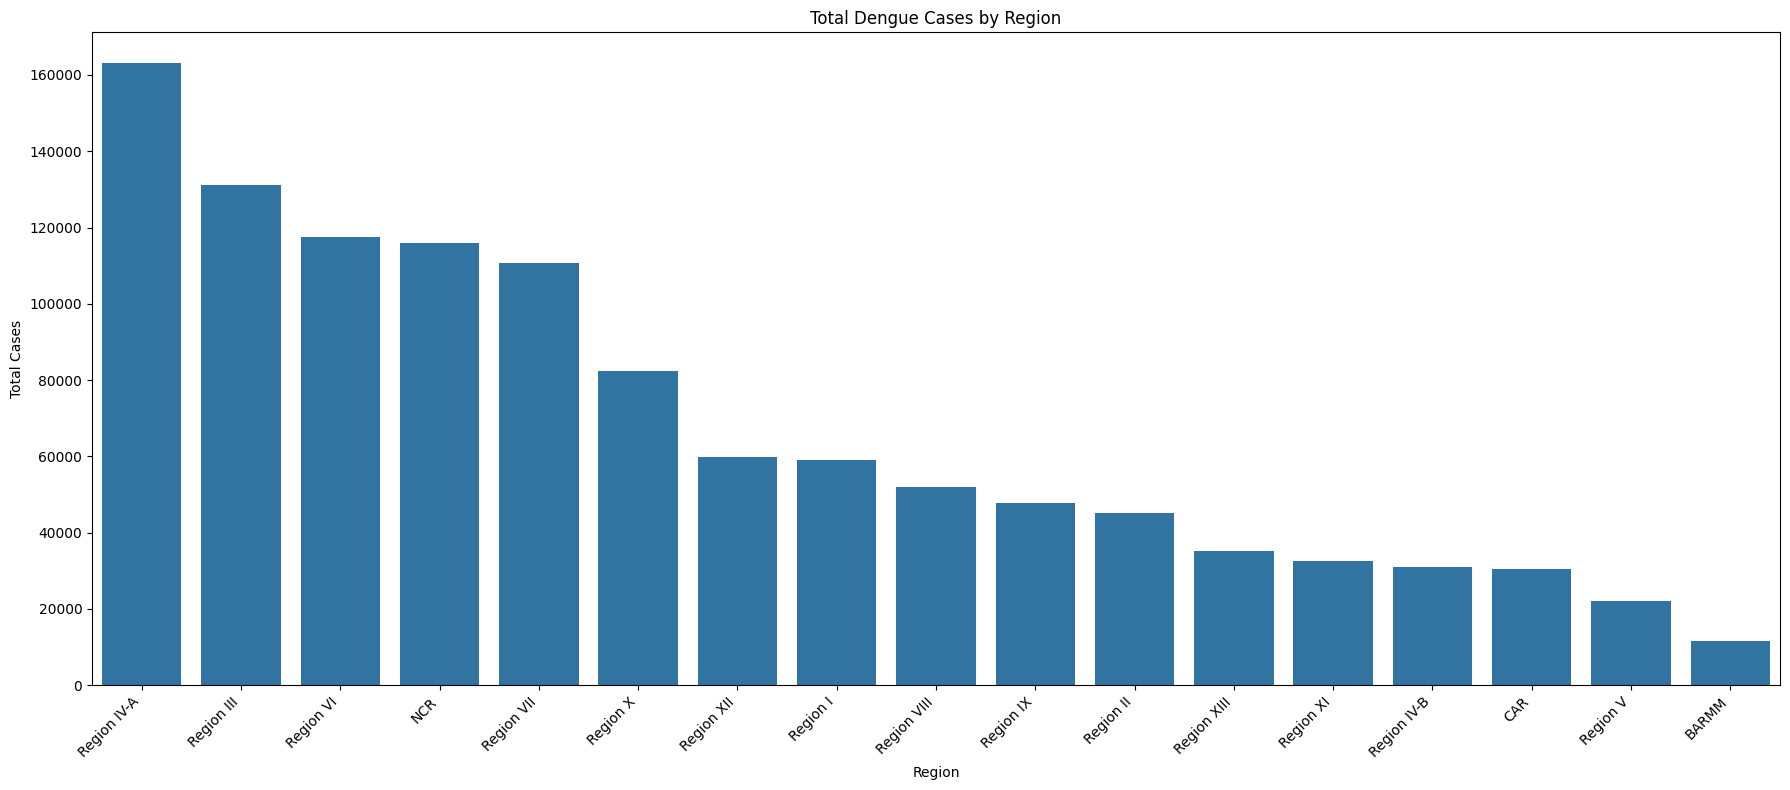

Region IV-A is the most affected region with 163,029 reported cases — significantly higher than other regions.


In [18]:
plt.figure(figsize=(18,8))
regional_totals = (dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).reset_index())
sns.barplot(data=regional_totals, x='Region', y='Dengue_Cases')
plt.title('Total Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

first_row_dict = regional_totals[:1].to_dict(orient='records')[0]
top_region_name = first_row_dict['Region']
top_region_value = int(first_row_dict['Dengue_Cases'])
print(f"{top_region_name} is the most affected region with "f"{top_region_value:,} reported cases — significantly higher than other regions.")


<h4>INSIGHT: 7</h4>
<h3>Region IV-A stands out as the clear hotspot, reporting about 163,029 cases, which is significantly higher than all other regions by a wide margin. Its case count is more than 30% higher than the next region, showing that its dengue burden is disproportionately heavy.</h3>

<h4>INSIGHT: 8</h4>
<h3>A noticeable drop appears after Region VII, where case totals fall from roughly 110,000+ to around 80,000, marking a strong separation between high burden and mid burden regions. This shows a clear gap between the regions with very high dengue cases and those with more average or moderate levels.</h3>

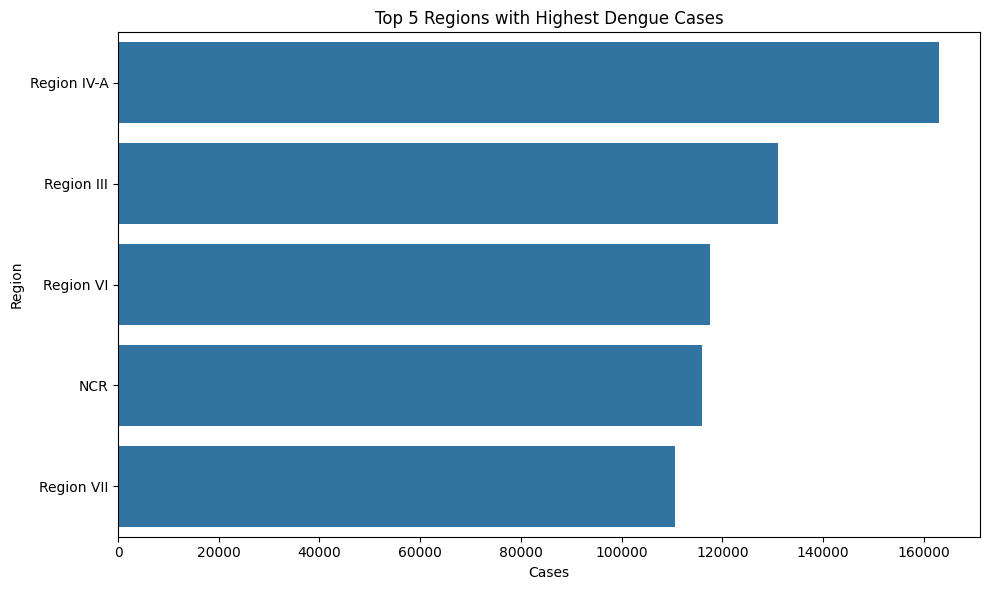

The top 5 regions account for 55.6% of all reported dengue cases in the dataset.


In [17]:
top5 = regional_totals.head(5).set_index('Region').Dengue_Cases
plt.figure(figsize=(10,6))
sns.barplot(x=top5.values, y=top5.index)
plt.title('Top 5 Regions with Highest Dengue Cases')
plt.xlabel('Cases')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

pct_top5 = top5.sum() / regional_totals['Dengue_Cases'].sum() * 100
print(f"The top 5 regions account for {pct_top5:.1f}% of all reported dengue cases in the dataset.")


<h4>INSIGHT: 9</h4>
<h3>The top five regions with the highest dengue cases show where the disease is most concentrated in the country. Region IV-A leads with about 163,029 cases, making it the most affected area. It is followed by Region III, which has around 132,000 cases, and Region VI, with roughly 120,000 cases, both showing very high transmission levels. NCR ranks fourth with about 118,000 cases, likely influenced by its large and dense population.
</h3>

In [19]:
# Ensure Mortality Rate exists
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Create Regional_Death table
Regional_Death = (
    dengue.groupby("Region")[["Dengue_Cases", "Dengue_Deaths", "Mortality_Rate"]]
    .mean()
    .reset_index()
)

Regional_Death


,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,BARMM,192.283333,5.533333,6.573534
1,CAR,509.700000,16.800000,6.973348
2,NCR,1932.766667,66.800000,9.412707
3,Region I,984.433333,2.616667,0.387983
4,Region II,752.350000,3.216667,0.431171
5,Region III,2184.400000,8.033333,0.328489
6,Region IV-A,2717.150000,10.866667,0.462963
7,Region IV-B,514.150000,2.166667,0.459179
8,Region IX,796.350000,8.866667,5.015920
9,Region V,369.450000,3.083333,0.974462


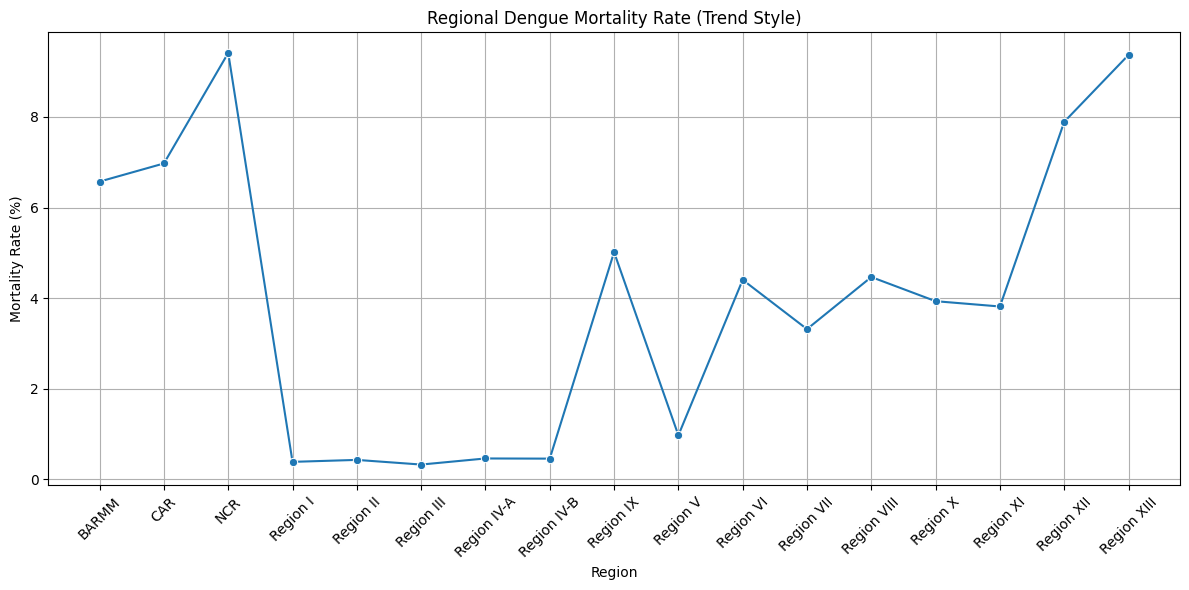

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Regional_Death,x='Region',y='Mortality_Rate',marker='o')
plt.title("Regional Dengue Mortality Rate (Trend Style)")
plt.xlabel("Region")
plt.ylabel("Mortality Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<h4>INSIGHT: 10</h4>
<h3>
Some regions, like NCR, Region XIII, and CAR, have the highest dengue mortality rates. This means that even if they do not always have the most dengue cases, a larger percentage of the people who get sick end up dying from the disease. while, Regions such as Region I, II, III, IV-A, and IV-B have very low mortality rates compared to the others. Even when some of them have many dengue cases, very few people die from the illness. This shows that these regions manage dengue cases well, with quick treatment and good awareness among the community. and maybe because those regions have the facilities that they needed compared to others </h3>